In [11]:
import pandas as pd

In [12]:
df = pd.read_excel('../data/MTBLS92.xlsx')
df.head()

,Idx,SampleID,Class,Menopause,ER,Grade,Her2,N-stage,T-stage,Timepoint,...,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138
0,1,A_1,0.0,2,1,2.0,0,0,3,BL,...,9.963454,3.976321,6.033208,20.737836,39.518648,4.372182,15.099900,15.520762,29.760339,2.890181
1,2,A_2,0.0,2,0,2.0,0,1,2,BL,...,12.106535,5.006672,7.112918,17.030243,14.513175,2.961922,16.137018,13.461109,11.717635,1.213627
2,3,A_3,0.0,2,1,2.0,0,2,5,BL,...,12.406024,5.279220,3.238246,23.586563,13.248736,4.775705,16.418746,18.986196,25.661178,1.724701
3,4,A_4,0.0,2,1,1.0,0,1,2,BL,...,6.644769,4.359540,2.003790,14.733730,6.092037,2.101370,10.146233,8.364284,13.960879,0.816202
4,5,A_5,0.0,2,1,2.0,0,1,2,BL,...,6.066591,4.565057,3.456530,15.371234,6.091531,1.318297,7.047676,6.197168,6.994256,0.754510


<Axes: title={'center': 'Class distribution of dataset'}>

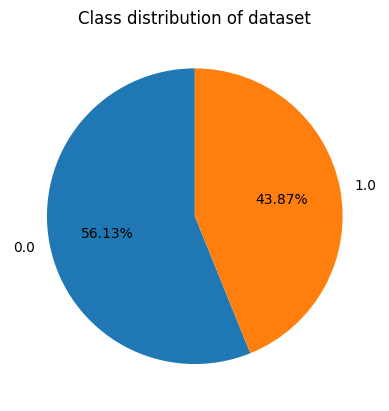

In [13]:
df['Class'].value_counts().plot(kind='pie', startangle=90, autopct='%.2f%%', title='Class distribution of dataset', ylabel='')

In [14]:
def missing_values(df):
    """
    This function takes a DataFrame and returns the percentage of missing values.
    """
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    percent = (total_missing / total_cells ) * 100
    print(f"Percentage of missing values in: {percent:.2f}%")

In [15]:
df.info( show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 150 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    Idx                    447 non-null    int64  
 1    SampleID               447 non-null    object 
 2    Class                  253 non-null    float64
 3    Menopause              447 non-null    int64  
 4    ER                     447 non-null    int64  
 5    Grade                  433 non-null    float64
 6    Her2                   447 non-null    int64  
 7    N-stage                447 non-null    int64  
 8    T-stage                447 non-null    int64  
 9    Timepoint              447 non-null    object 
 10   Series                 447 non-null    object 
 11   Chemotherapy response  336 non-null    object 
 12   M1                     447 non-null    float64
 13   M2                     447 non-null    float64
 14   M3                     447 non-null    f

In [16]:
# Dropping all rows without a label, because a label is essential
df = df.dropna(subset=['Class']) 

In [17]:
# Filling the null Grade values with its mean
df['Grade'] = df['Grade'].fillna(value=df['Grade'].mean()) 

In [18]:
# Dropping the 'Chemotherapy response' column since its categorical and has too many missing values (imputation is tough in categorical features)
df = df.drop(['Idx','SampleID','Timepoint','Chemotherapy response'], axis=1) 

In [19]:
missing_values(df)

Percentage of missing values in: 0.00%


In [20]:
df.to_excel('../data/MTBLS92_preprocessed.xlsx', index=False)